### Mini Programming Assignment 5: Implement a Hash Table
##### *Notebook created by: Jacob Kreider*

In this notebook, I will compare the search performance of linear and binary searches with hash table lookup performance (in the form of a Python dictionary).



In [0]:
from numpy.random import seed
from numpy.random import randint
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import string, random

In [2]:
#Create a list of 100 names (randomly pick 10 characters e.g. abcdefghij, 
#any order is fine, just make sure there are no duplicates in the name)
#Store these names as you generate them (it should be an unsorted array)

namesArray = np.array([])

while len(namesArray) <= 100:
    namesArray = np.append(namesArray, ''.join(random.sample(string.ascii_lowercase,10)).capitalize())

    
#Making sure there are no duplicates
def contains_duplicates(X):
    return len(np.unique(X)) != len(X) #Tells me if the length of the unique array != namesArray

contains_duplicates(namesArray) #Will return 'FALSE' if no duplicates exist

False

In [0]:
#Lookup/search any five names from this unsorted array using linear search, and capture the time

#Let's define simple search
# Python code for linear search x in arr[]. If x 
# is present then return its location, otherwise 
# return -1 
def search(arr, x): 

    for i in range(len(arr)): 

        if arr[i] == x: 
            return i 

    return -1

#Let's pick some random elements from the array to search for:
seed(123)
searchTerms = np.random.choice(namesArray, 5, replace = False)

#And pass this array into our simple search function, and time it 1,000 times, taking the average:

start = time.clock()
for i in range(1000):
    for term in searchTerms:
        answer = search(namesArray, term)
stop = time.clock()
simpleTime = (stop - start)/1000



In [0]:
#Now store the above 100 names in a dictionary data structure and look/search 
#for the same five names in the dictionary

dictOfNames = { namesArray[i] : i for i in range(0, len(namesArray) ) }

#Will run 1,000 times and take the average time:
start = time.clock()
for i in range(1000):
    for term in searchTerms:
            if term in dictOfNames:
                (term)
stop =time.clock()
dictTime = (stop - start)/1000


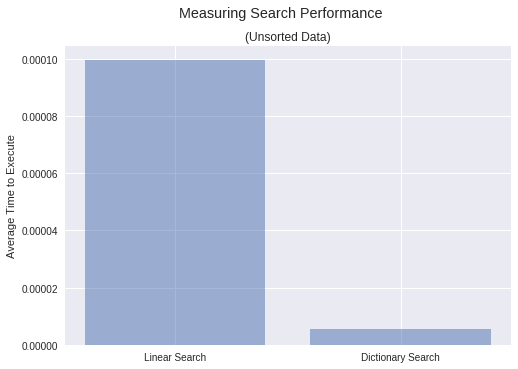

In [5]:
#Capture the time that took to lookup the names using linear search and then using dictionary, 
#draw a graph to show the difference

objects = ('Linear Search', 'Dictionary Search')
y_pos = np.arange(len(objects))
performance = [simpleTime, dictTime]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Time to Execute')
plt.title('(Unsorted Data)')
plt.suptitle('Measuring Search Performance')
plt.style.use('seaborn-colorblind')
 
plt.show()

In [0]:
#Now sort the array (use any sorting algorithm that you have learned so far 
#and justify why are you using it)

sortedNames = np.sort(namesArray)


In the above sort, I chose to use the built-in sort function from Numpy, as it performs far better than any of the sort functions I've learned elsewhere. It comes very close to O(log(n)) efficiency.


In [7]:
#Pick the names from this array that are at 10th, 30th, 50th, 70th, 90th, and 100th positions, 
#store them in a temporary array somewhere for later use

indexKeep = [9,29,49,69, 89, 99] #Since we're selecting by position, not index, we'll subtract 1 from each
newSearches = np.take(namesArray, indexKeep)
newSearches

array(['Jtqoangsxf', 'Dntsivufoe', 'Jgbypmovse', 'Boicjwntvs',
       'Aoefdxwqvs', 'Gijycvlems'], dtype='<U32')

In [0]:
#Now search for these six names in the main array (one by one) using linear search, 
#then binary search and capture the time it takes using both algorithms

#Linear Search (taking average of 1K searches again):

start = time.clock()
for i in range(1000):
    for term in newSearches:
        answer = search(sortedNames, term)
stop = time.clock()
simpleTimeNew = (stop - start)/1000

simpleTimeNew

#Binary Search:

def binarySearch(list, item):
    low = 0
    high = len(list) - 1
    
    while low <= high:
        mid = (low + high)
        guess = list[mid]
        if guess == item:
            return mid
        if guess > item:
            high = mid - 1
        else:
            low = mid + 1
    return None

start = time.clock()
for i in range(1000):
    for item in newSearches:
        binarySearch(sortedNames, item)
stop = time.clock()

binaryTimeNew = (stop - start)/1000

#Now look up for these names in the dictionary and capture the time

start = time.clock()
for i in range(1000):
    for term in newSearches:
            if term in dictOfNames:
                term
stop =time.clock()
dictTimeNew = (stop - start)/1000



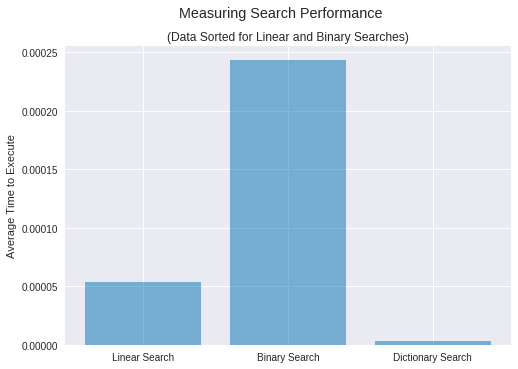

In [9]:
#Draw another graph comparing times of linear search, binary search and dictionary search 
#that took to search for the five names

objects = ('Linear Search', 'Binary Search', 'Dictionary Search')
y_pos = np.arange(len(objects))
performance = [simpleTimeNew,binaryTimeNew, dictTimeNew]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Time to Execute')
plt.title('(Data Sorted for Linear and Binary Searches)')
plt.suptitle('Measuring Search Performance')
plt.style.use('seaborn-colorblind')
 
plt.show()

### Executive Summary

In the above report, we tested several methods for searching relatively large data structures for specific items- in this case, names. We stored the names in both sorted and unsorted arrays, as well as in a dictionary format that makes use of hash table structures.

Due to the nature of hash tables, where these strings (names) are mapped to number values, searches and "lookup" tasks outperform simple, linear search in both sorted and unsorted data, and even binary search on sorted arrays.

It is clear that if searches will need to be done regularly on stored data, hash tables (or dictionaries,in Python) are the clear choice for maximizing efficiency and minimizing run times.

